# Segunda Tarefa relacionada à Árvore de Decisão

## Alunos

* Daniel La Rubia Rolim -- DRE: 115033904
* Victor Ribeiro Pires -- DRE: 113051532

# Quanto ao *dataset* selecionado

* ***Dataset:*** [Performance de alunos em provas](https://www.kaggle.com/spscientist/students-performance-in-exams)
* **Objetivo:** Descobrir a classe que o aluno pertence baseado nos dados disponíveis ou descobrir, baseado nos dados, se o aluno se preparou ou não para o exame. 

## Lista de atributos

* Gênero (*gender*)
  * **[** male, female **]**
* Raça/Etnia (*race/ethnicity*) 
  * **[** A, B, C, D, E **]**
* Nível de educação dos pais (*parental level of education*) 
  * **[** associate's degree, bachelor's degree, high school, master's degree, some college, some high school **]**
* Almoço (*lunch*)
  * **[** standart, free/reduced **]**
* Curso de preparação para o teste (*test preparation course*) 
  * **[** none, completed **]**
* Pontuação em matemática (*math score*)
  * **[** 0-100 **]**
* Pontuação em leitura (*reading score*)
  * **[** 0-100 **]**
* Pontuação em escrita (*writing score*)
  * **[** 0-100 **]**


* **Quantidade de instâncias:** 1000 linhas



# Código

## Importando dependências

In [ ]:
# Carregando Bibliotecas
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importa o classificador de árvore de decisão
from sklearn import metrics #Importa métrica para calcular acurácia - módulo do scikit-learn
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import train_test_split as train_test

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Inicializando a base de dados

Será utilizado o *dataset* **StudentsPerformance.csv**, contendo dados para analisar a performance de estudantes em provas. 

In [ ]:
# Atribudos
columns = ['Gender', 'Race/Ethnicity', 'Parental Level of Education', 'Lunch', 'Test preparation', 'Math score', 'Reading score', 'Writing score']

# Importando base de dados
dataset = pd.read_csv("StudentsPerformance.csv", header=0, names=columns)

# Exemplo do dataset
dataset.head()

,Gender,Race/Ethnicity,Parental Level of Education,Lunch,Test preparation,Math score,Reading score,Writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Definindo conceitos

Neste ponto iremos definir os dados que serão utilizados nas avaliações. O primeiro passo é preparar os dados para que, na sequência, seja construído nosso classificador. Utilizaremos a função `pd.get_dummies()` do *Pandas*. 



In [ ]:
# Colunas que serão consideradas na análise
features = ['Race/Ethnicity', 'Parental Level of Education', 'Lunch', 'Test preparation', 'Math score', 'Reading score', 'Writing score']

features_X = ['Race/Ethnicity', 'Parental Level of Education', 'Lunch', 'Test preparation', 'Math score', 'Reading score', 'Writing score']
features_Y = ['Gender', 'Parental Level of Education', 'Lunch', 'Test preparation', 'Math score', 'Reading score', 'Writing score']
features_Z = ['Gender', 'Race/Ethnicity', 'Parental Level of Education', 'Test preparation', 'Math score', 'Reading score', 'Writing score']


# Dataset contendo somente as colunas que serão utilizadas e excluindo colunas de conceito
t_dataset = dataset[features]

t_dataset_X = dataset[features_X]
t_dataset_Y = dataset[features_Y]
t_dataset_Z = dataset[features_Z]


# Lista de conceitos que desejamos predizer
concept_X = dataset['Gender']
concept_Y = dataset['Race/Ethnicity']
concept_Z = dataset['Lunch']


# Novo conjunto de dados tratado pelo Pandas
hot_data = pd.get_dummies(t_dataset[features])

hot_data_X = pd.get_dummies(t_dataset_X[features_X])
hot_data_Y = pd.get_dummies(t_dataset_Y[features_Y])
hot_data_Z = pd.get_dummies(t_dataset_Z[features_Z])


# Exemplo do dataset após o tratamento
hot_data.head()

,Math score,Reading score,Writing score,Race/Ethnicity_group A,Race/Ethnicity_group B,Race/Ethnicity_group C,Race/Ethnicity_group D,Race/Ethnicity_group E,Parental Level of Education_associate's degree,Parental Level of Education_bachelor's degree,Parental Level of Education_high school,Parental Level of Education_master's degree,Parental Level of Education_some college,Parental Level of Education_some high school,Lunch_free/reduced,Lunch_standard,Test preparation_completed,Test preparation_none
0,72,72,74,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


## Criando classificador para a Árvore de Decisão



Serão criados classificadores para os conceitos **X**, **Y**, e **Z**. Todos utilizando entropia como critério. 


In [ ]:
# Criando classificador (utilizando 'Entropia' como critério)
classifier = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=10)

## Separando conjuntos para treinamento do classificador

Para realizar a divisão entre [60% e 40%] e [80% e 20%] para conjuntos de treinamento e teste, respectivamente, será utilizado o módulo `train_test_split`.



Para visualizar a árvore de decisão, será utilizado o pacote [*graphviz*](https://pypi.org/project/graphviz/). 

#### Divisão da base de dados

In [ ]:
# Grupo 1 - [60% e 40%]

A1_train, A1_test, X1_train, X1_test = train_test(hot_data_X, concept_X, test_size=0.4, train_size=0.6, random_state=None, shuffle=True, stratify=None)
B1_train, B1_test, Y1_train, Y1_test = train_test(hot_data_Y, concept_Y, test_size=0.4, train_size=0.6, random_state=None, shuffle=True, stratify=None)
C1_train, C1_test, Z1_train, Z1_test = train_test(hot_data_Z, concept_Z, test_size=0.4, train_size=0.6, random_state=None, shuffle=True, stratify=None)

In [ ]:
# Grupo 2 - [80% e 20%]

A2_train, A2_test, X2_train, X2_test = train_test(hot_data_X, concept_X, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)
B2_train, B2_test, Y2_train, Y2_test = train_test(hot_data_Y, concept_Y, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)
C2_train, C2_test, Z2_train, Z2_test = train_test(hot_data_Z, concept_Z, test_size=0.2, train_size=0.8, random_state=None, shuffle=True, stratify=None)

#### Treinamento dos Classificadores

Identificamos que o treinamento precisa ser realizado na mesma célula que serão geradas as árvores. Portanto o código comentado a seguir foi mantido apenas para visualização.


In [ ]:
# # Classificadores para o conceito X
classifier_X_DB1 = classifier.fit(A1_train, X1_train) # 60 - 40
# classifier_X_DB2 = classifier.fit(A2_train, X2_train) # 80 - 20

# # Classificadores para o conceito Y
# classifier_Y_DB1 = classifier.fit(B1_train, Y1_train) # 60 - 40
# classifier_Y_DB2 = classifier.fit(B2_train, Y2_train) # 80 - 20

# # Classificadores para o conceito Z
# classifier_Z_DB1 = classifier.fit(C1_train, Z1_train) # 60 - 40
# classifier_Z_DB2 = classifier.fit(C2_train, Z2_train) # 80 - 20

### KFold

In [ ]:
from sklearn.model_selection import KFold

def kfold_accuracy(dataset, concept, splits=3, criterion="entropy"):
  kf = KFold(n_splits=splits)
  sum_train = 0
  sum_test = 0

  for train_indexes, test_indexes in kf.split(dataset):
    X_train, X_test = dataset.iloc[train_indexes], dataset.iloc[test_indexes]
    y_train, y_test = concept[train_indexes], concept[test_indexes]
    
    clf = DecisionTreeClassifier(criterion)
    clf = clf.fit(X_train, y_train)
    
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    acc_train = metrics.accuracy_score(y_train, y_pred_train)
    acc_test = metrics.accuracy_score(y_test, y_pred_test)
    # print("Acurácia de treino:", acc_train)
    # print("Acurácia de teste:", acc_test)

    sum_train += acc_train
    sum_test += acc_test

  print("Acurácia de treino:", sum_train/splits)
  print("Acurácia de teste:", sum_test/splits)

  return sum_train/splits, sum_test/splits

print("Conceito X - Genero")
kfold_accuracy(hot_data_X, concept_X,14)
print("\n\nConceito Y - Raça/Etnia")
kfold_accuracy(hot_data_Y, concept_Y,14)
print("\n\nConceito Z - Almoço")
kfold_accuracy(hot_data_Z, concept_Z,14)


Conceito X - Genero
Acurácia de treino: 1.0
Acurácia de teste: 0.8318661971830986


Conceito Y - Raça/Etnia
Acurácia de treino: 1.0
Acurácia de teste: 0.24591996422982346


Conceito Z - Almoço
Acurácia de treino: 0.9990768517978441
Acurácia de teste: 0.6090012295998212


(0.9990768517978441, 0.6090012295998212)

## Gerando árvores de Decisão

**Grupo 1:**
* **60%** para treinamento
* **40%** para testes

**Grupo 2:**
* **80%** para treinamento
* **20%** para testes

### Predição de Gênero

Possui como objetivo prever o sexo do indivíduo, havendo como valores possíveis masculino (*male*) e feminino (*female*).

#### Grupo 1


##### Treinamento

Acurácia: 0.8483333333333334


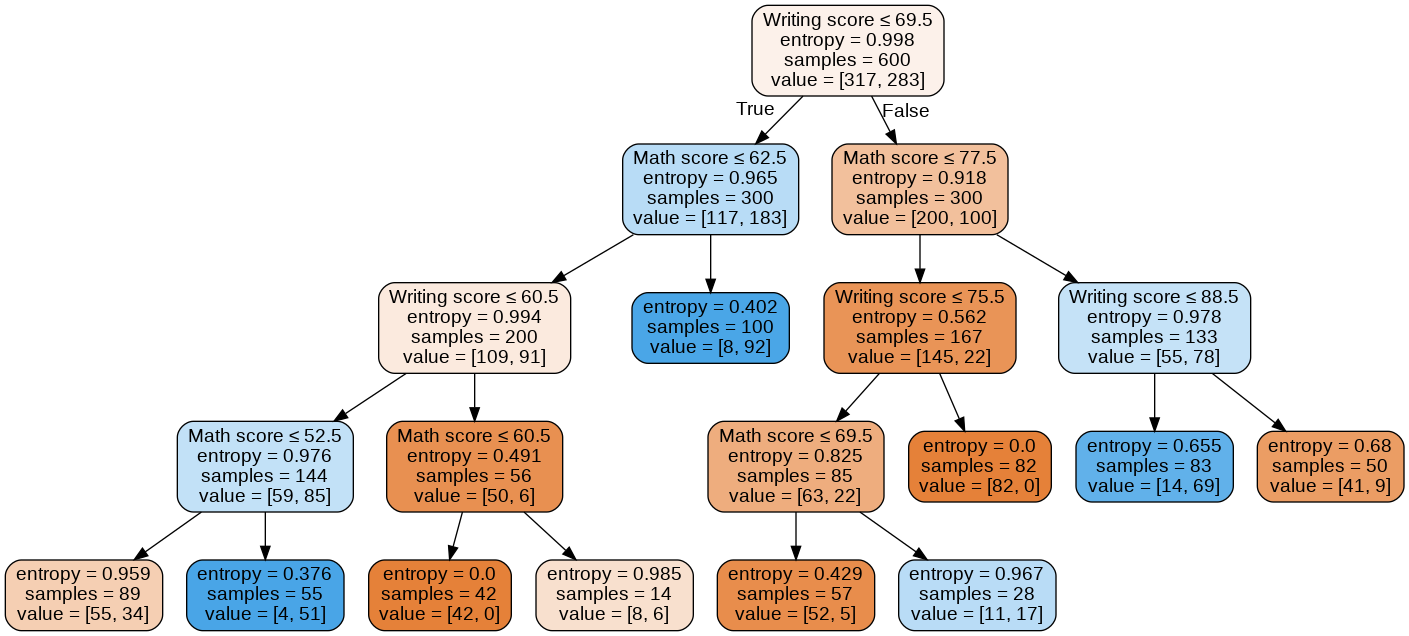

In [ ]:
# Treinamento do Classificador: - classifier_X_DB1
classifier_X_DB1 = classifier.fit(A1_train, X1_train) # 60 - 40

dot_data = StringIO()
export_graphviz(
    classifier_X_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=A1_train.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_X_60-40.png')

x_pred_1 = classifier_X_DB1.predict(A1_train)
print("Acurácia: " + str(metrics.accuracy_score(X1_train, x_pred_1)))

Image(tree.create_png())

##### Teste

Acurácia: 0.7925


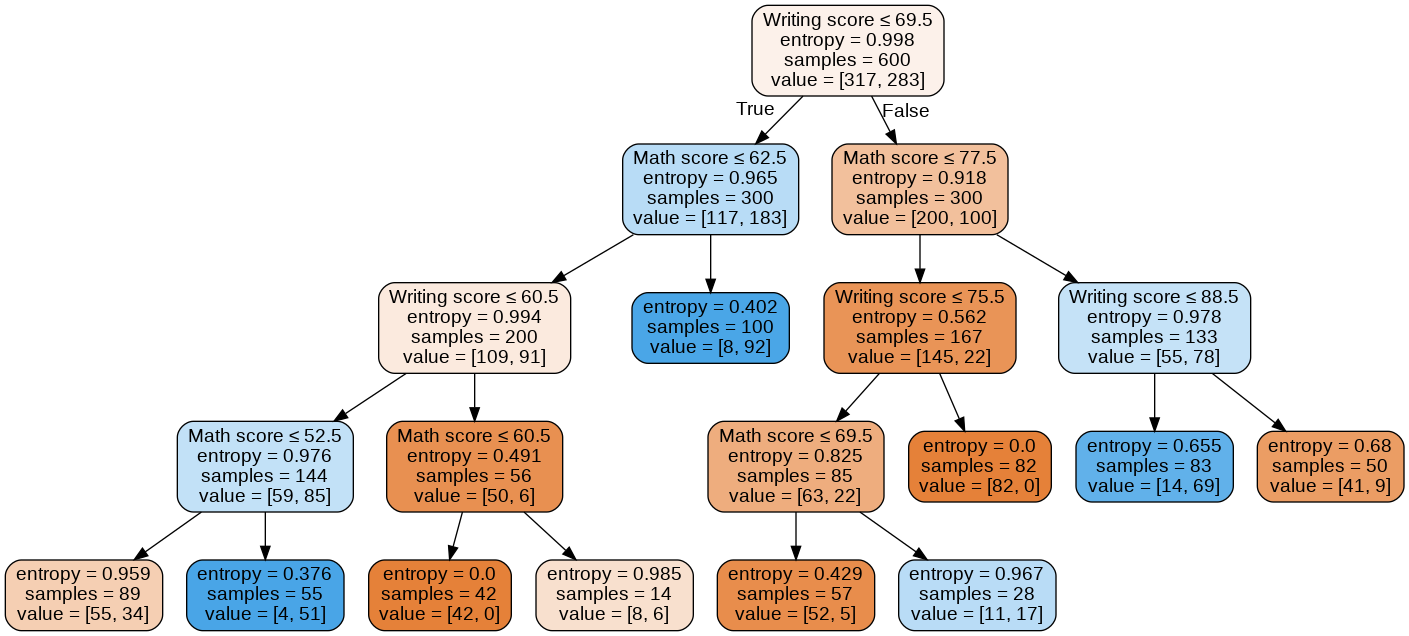

In [ ]:
# Classificador treinado: - classifier_X_DB1

dot_data = StringIO()
export_graphviz(
    classifier_X_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=A1_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_X_60-40.png')

x_pred_1_t = classifier_X_DB1.predict(A1_test)
print("Acurácia: " + str(metrics.accuracy_score(X1_test, x_pred_1_t)))

Image(tree.create_png())

#### Grupo 2

##### Treinamento

Acurácia: 0.825


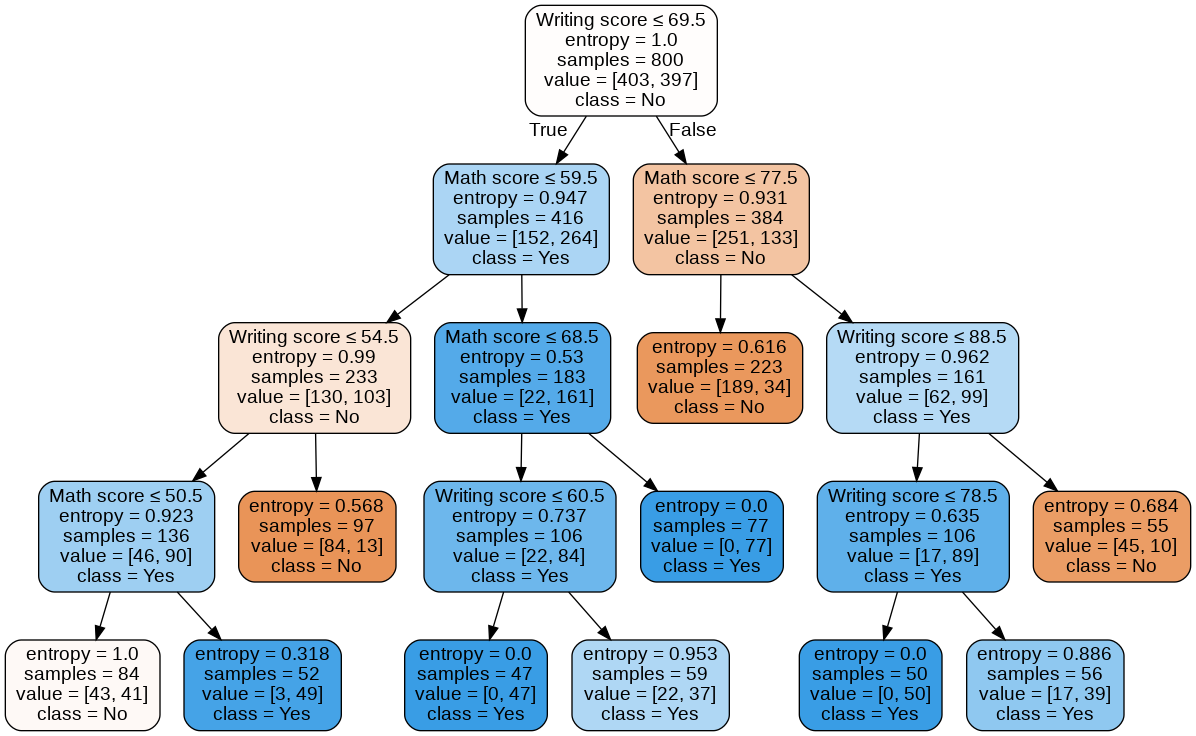

In [ ]:
# Treinamento do Classificador: - classifier_X_DB2
classifier_X_DB2 = classifier.fit(A2_train, X2_train) # 80 - 20

dot_data = StringIO()
export_graphviz(
    classifier_X_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=A2_train.columns,
    class_names=['No', 'Yes']
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_X_80-20.png')

x_pred_2 = classifier_X_DB2.predict(A2_train)
print("Acurácia: " + str(metrics.accuracy_score(X2_train, x_pred_2)))

Image(tree.create_png())

##### Teste

Acurácia: 0.795


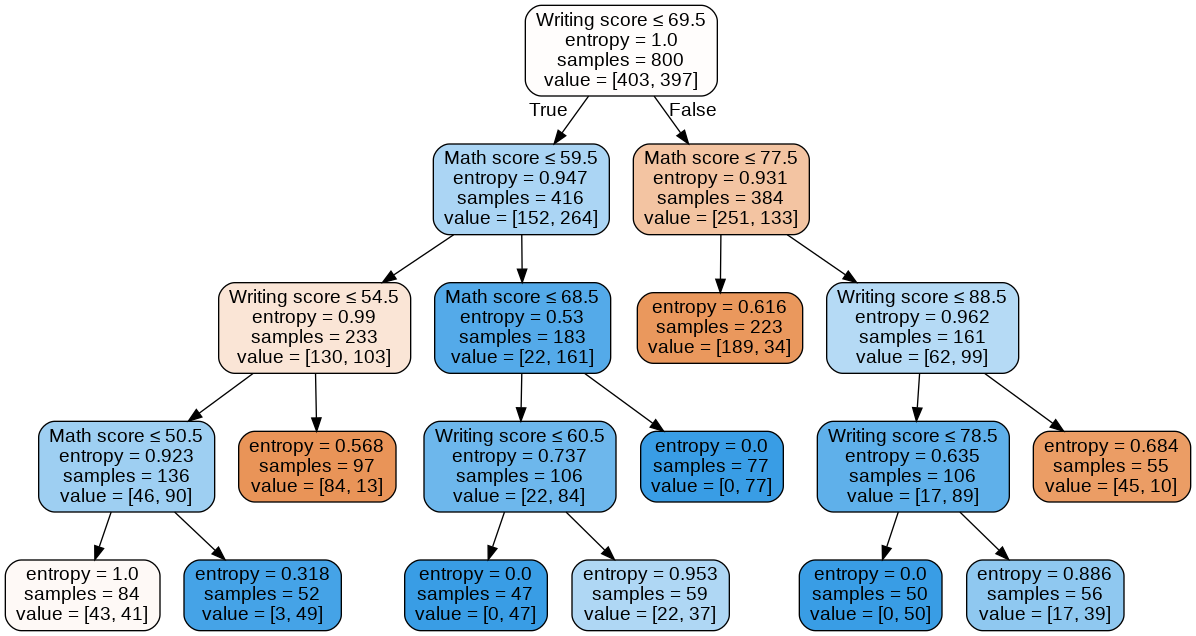

In [ ]:
# Classificador treinado: - classifier_X_DB2

dot_data = StringIO()
export_graphviz(
    classifier_X_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=A2_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_X_80-20.png')

x_pred_2_t = classifier_X_DB2.predict(A2_test)
print("Acurácia: " + str(metrics.accuracy_score(X2_test, x_pred_2_t)))

Image(tree.create_png())

### Predição de Raça/Etnia

O objetivo, neste caso, é prever a qual grupo o indivíduo pertence, sendo o grupo formado por opções entre A e E.

**[A, B, C, D, E]**

#### Grupo 1

##### Treinamento

Acurácia: 0.365


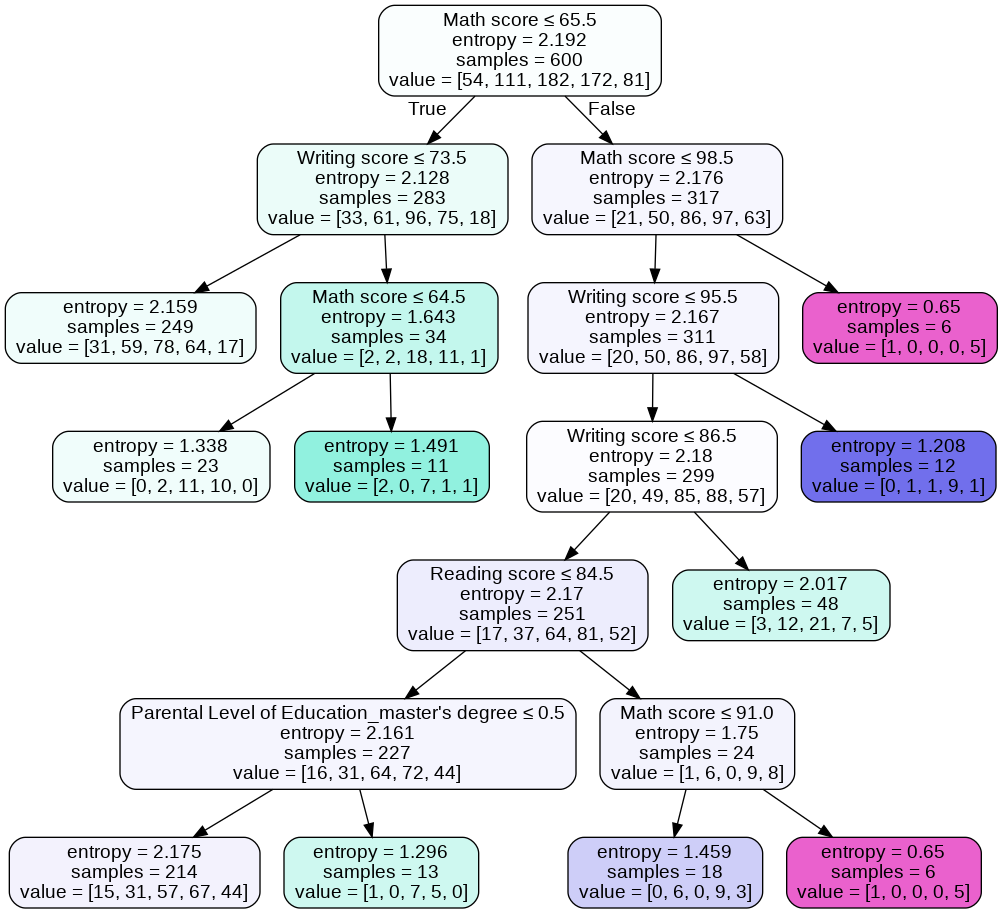

In [ ]:
# Treinamento do Classificador: - classifier_Y_DB1
classifier_Y_DB1 = classifier.fit(B1_train, Y1_train) # 60 - 40

dot_data = StringIO()
export_graphviz(
    classifier_Y_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=B1_train.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_Y_60-40.png')

y_pred_1 = classifier_Y_DB1.predict(B1_train)
print("Acurácia: " + str(metrics.accuracy_score(Y1_train, y_pred_1)))

Image(tree.create_png())

##### Teste

Acurácia: 0.3375


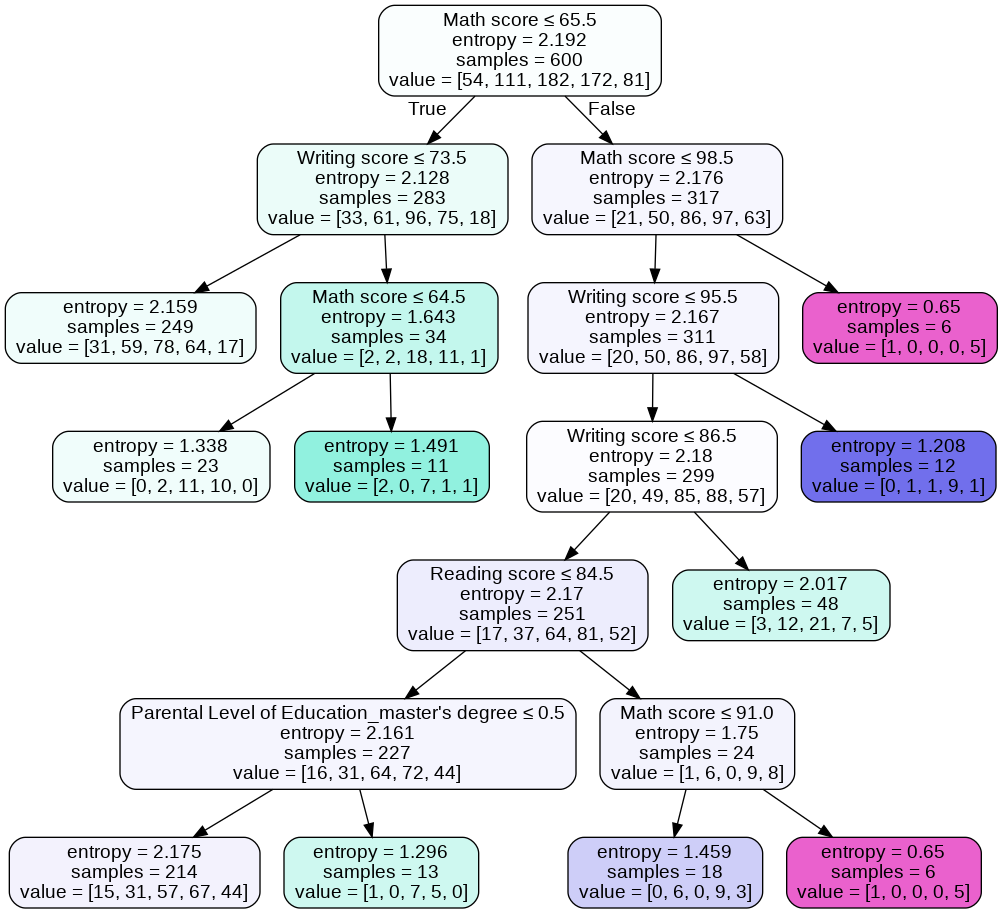

In [ ]:
# Classificador treinado: - classifier_Y_DB1

dot_data = StringIO()
export_graphviz(
    classifier_Y_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=B1_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_Y_60-40.png')

y_pred_1_t = classifier_Y_DB1.predict(B1_test)
print("Acurácia: " + str(metrics.accuracy_score(Y1_test, y_pred_1_t)))

Image(tree.create_png())

#### Grupo 2

##### Treinamento

Acurácia: 0.34375


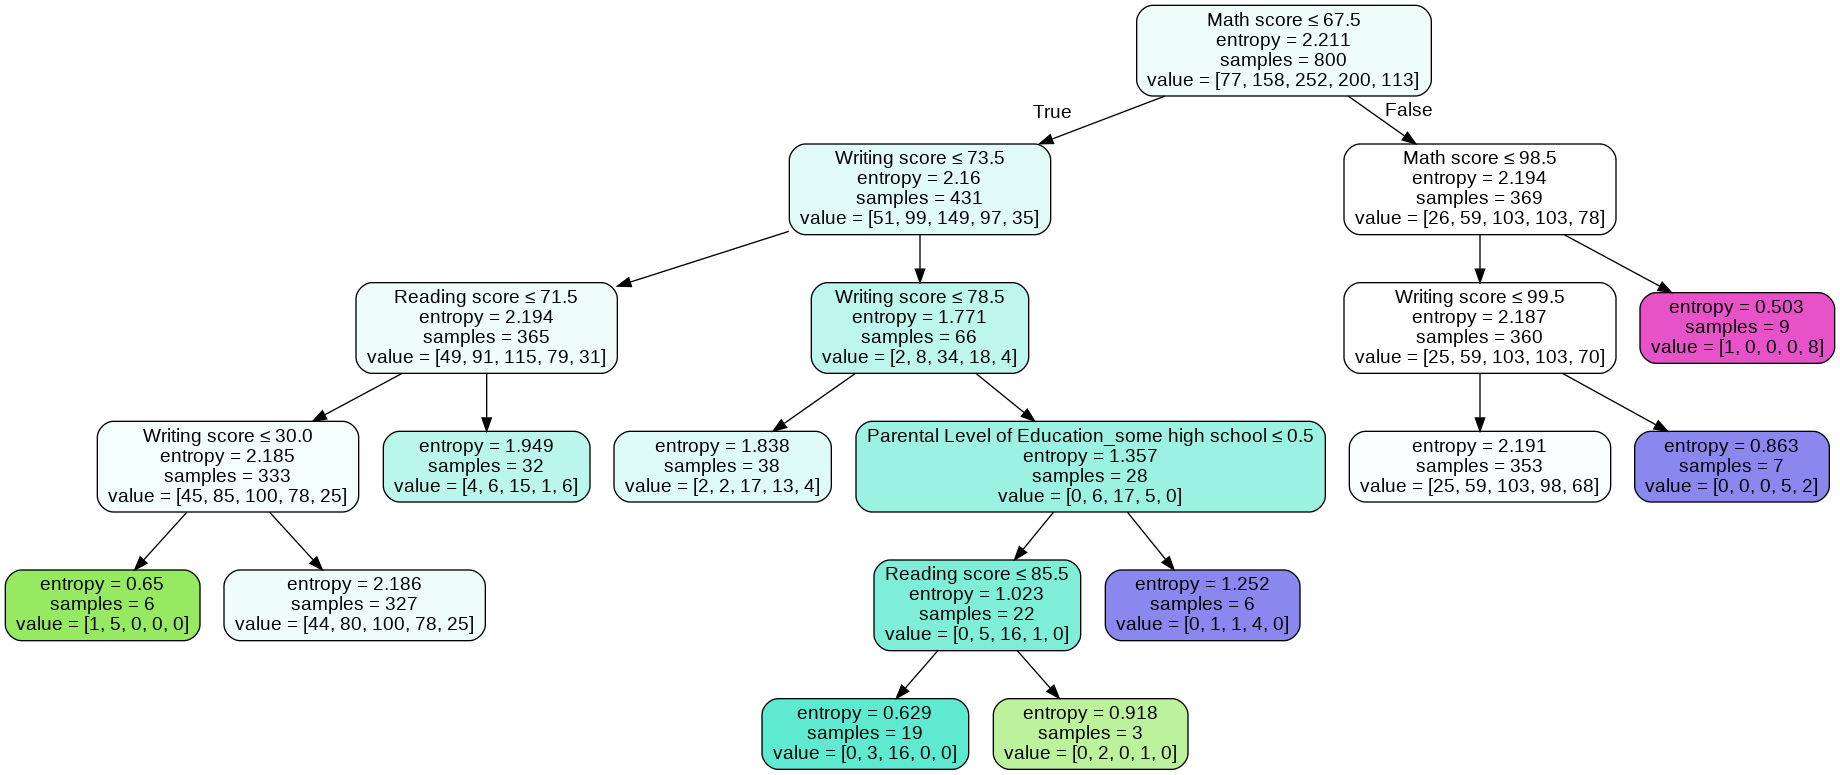

In [ ]:
# Treinamento do Classificador: - classifier_Y_DB2
classifier_Y_DB2 = classifier.fit(B2_train, Y2_train) # 80 - 20

dot_data = StringIO()
export_graphviz(
    classifier_Y_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=B2_train.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_Y_80-20.png')

y_pred_2 = classifier_Y_DB2.predict(B2_train)
print("Acurácia: " + str(metrics.accuracy_score(Y2_train, y_pred_2)))

Image(tree.create_png())

##### Teste

Acurácia: 0.325


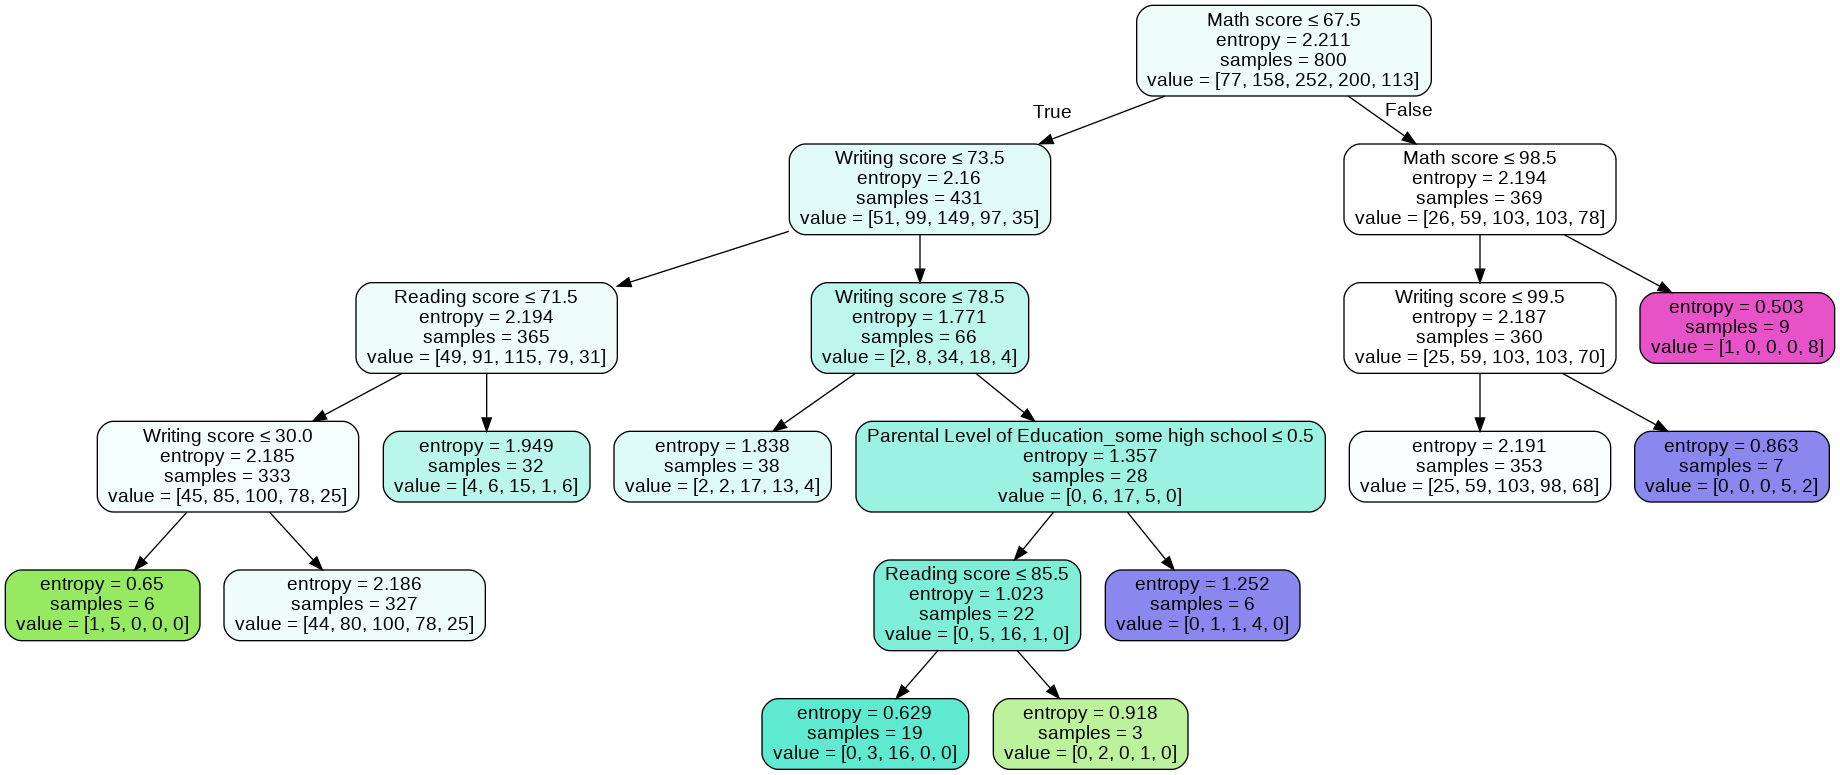

In [ ]:
# Classificador treinado: - classifier_Y_DB2

dot_data = StringIO()
export_graphviz(
    classifier_Y_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=B2_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_Y_80-20.png')

y_pred_2_t = classifier_Y_DB2.predict(B2_test)
print("Acurácia: " + str(metrics.accuracy_score(Y2_test, y_pred_2_t)))

Image(tree.create_png())

### Predição de Almoço

Busca predizer se o indivíduo almoçou ou está em jejum, sendo os valores possíveis **standart** e **free/reduced**.

#### Grupo 1

##### Treinamento

Acurácia: 0.7233333333333334


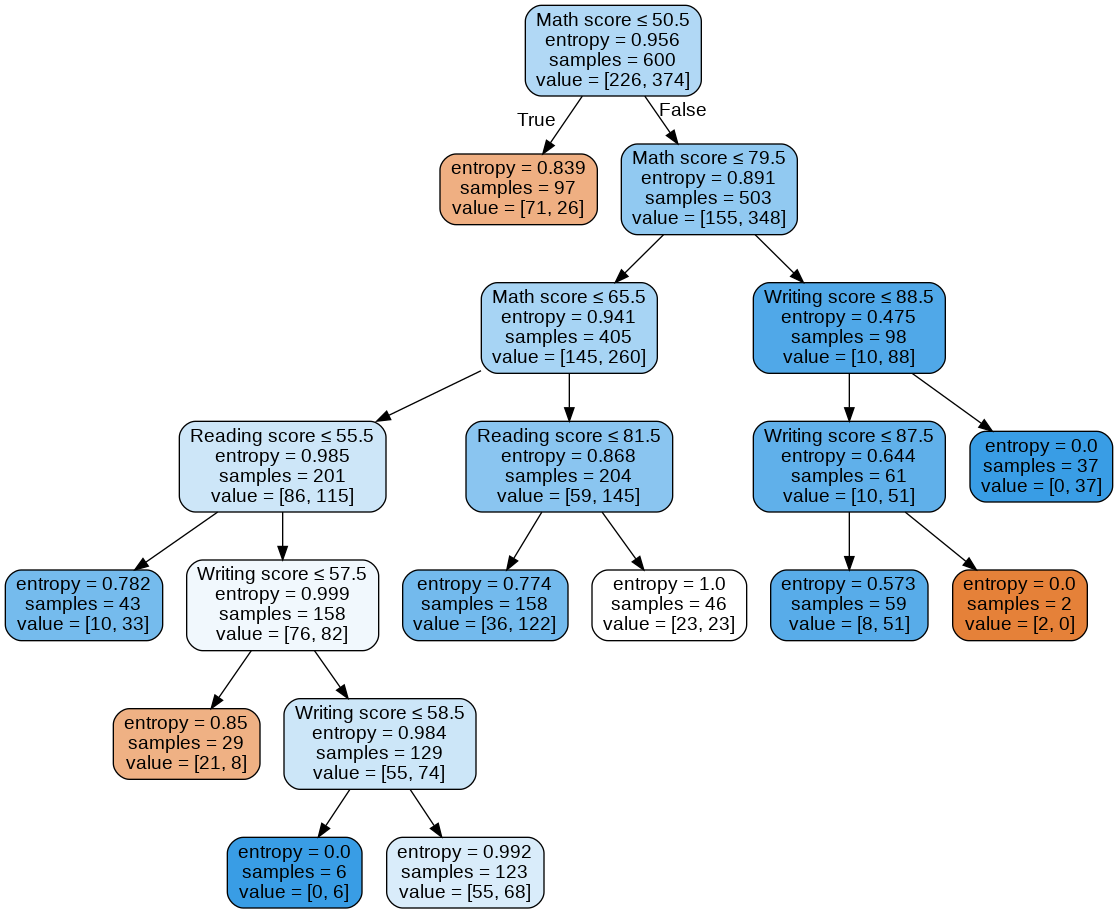

In [ ]:
# Treinamento do Classificador: - classifier_Z_DB1
classifier_Z_DB1 = classifier.fit(C1_train, Z1_train) # 60 - 40

dot_data = StringIO()
export_graphviz(
    classifier_Z_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=C1_train.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_Z_60-40.png')

z_pred_1 = classifier_Z_DB1.predict(C1_train)
print("Acurácia: " + str(metrics.accuracy_score(Z1_train, z_pred_1)))

Image(tree.create_png())

##### Teste

Acurácia: 0.6925


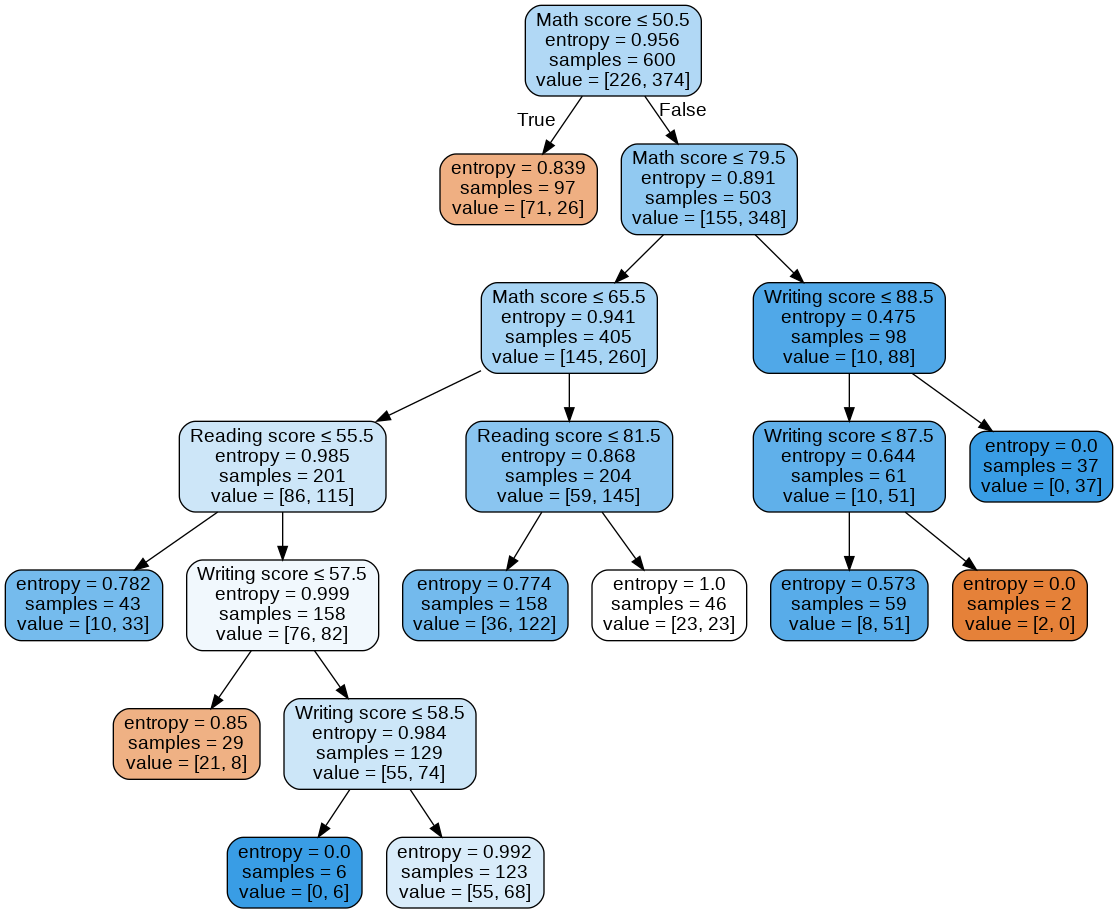

In [ ]:
# Classificador treinado: - classifier_Z_DB1

dot_data = StringIO()
export_graphviz(
    classifier_Z_DB1,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=C1_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_Z_60-40.png')

z_pred_1_t = classifier_Z_DB1.predict(C1_test)
print("Acurácia: " + str(metrics.accuracy_score(Z1_test, z_pred_1_t)))

Image(tree.create_png())

#### Grupo 2

##### Treinamento

Acurácia: 0.73125


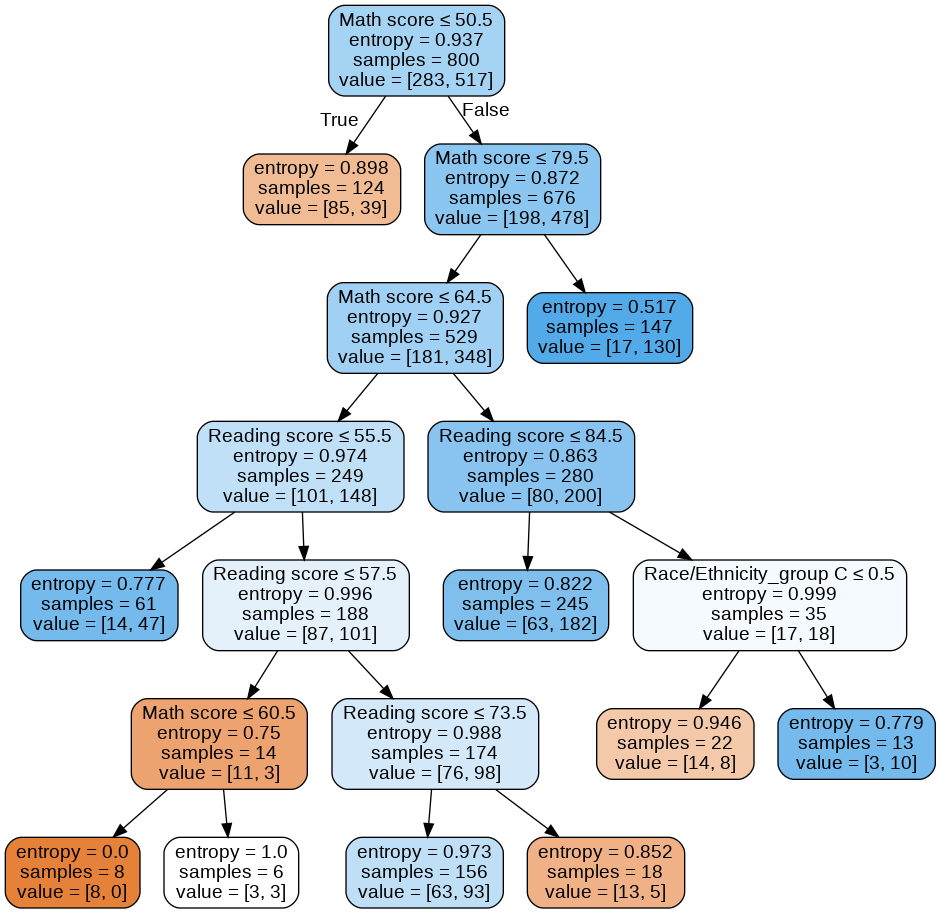

In [ ]:
# Treinamento do Classificador: - classifier_Z_DB2
classifier_Z_DB2 = classifier.fit(C2_train, Z2_train) # 80 - 20

dot_data = StringIO()
export_graphviz(
    classifier_Z_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=C2_train.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('treinamento_Z_80-20.png')

z_pred_2 = classifier_Z_DB2.predict(C2_train)
print("Acurácia: " + str(metrics.accuracy_score(Z2_train, z_pred_2)))

Image(tree.create_png())

##### Teste

Acurácia: 0.69


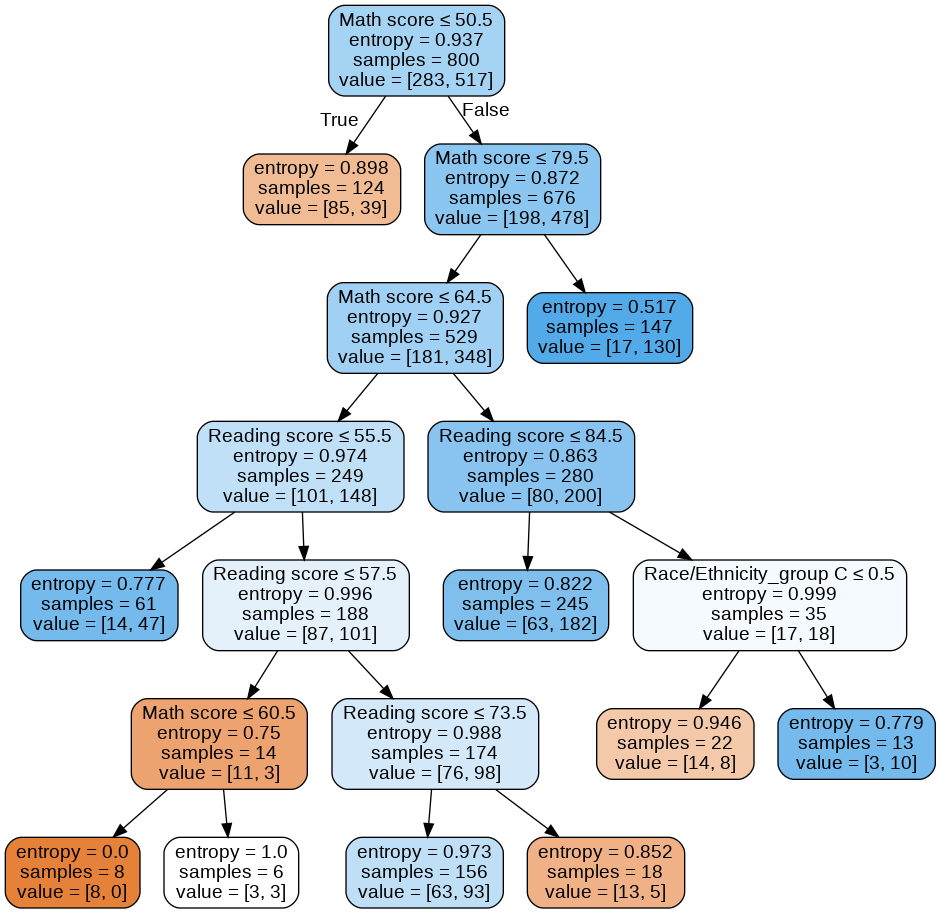

In [ ]:
# Classificador treinado: - classifier_Z_DB2

dot_data = StringIO()
export_graphviz(
    classifier_Z_DB2,
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=C2_test.columns
)

tree = pydotplus.graph_from_dot_data(dot_data.getvalue())
tree.write_png('teste_Z_80-20.png')

z_pred_2_t = classifier_Z_DB2.predict(C2_test)
print("Acurácia: " + str(metrics.accuracy_score(Z2_test, z_pred_2_t)))

Image(tree.create_png())

# Observações realizadas e experimentos

O experimento base consistiu em criar um classificador utilizando *entropia* e todos os atributos disponíveis na tabela. A decisão se deu pelo fato de que o *dataset* não é muito grande, portanto acreditou-se que utilizar todos os atributos agregaria mais informação útil para treinamento e criação da árvore. 

A princípio, foram criados três conceitos:

* Gênero
* Raça/Etnia
* Almoço

O objetivo consistiu em verificar a acurácia para a predição dos três conceitos e analisar a coerência dos resultados. Para todos os conceitos, foram geradas árvores com dois grupos:

* Grupo 1: 
  * 60% para treinamento
  * 40% para testes
* Grupo 2:
  * 80% para treinamento
  * 20% para testes

A predição de gênero foi a com melhor acurácia, possuindo uma pequena alteração na taxa quando treinado no **Grupo 2** em relação ao **Grupo 1**. Hora a acurácia foi melhor, hora foi pior. Isto se deve ao fato de utilizarmos o **shuffle**. Foi observado também que o **shuffle=True** apresentou resultados melhores do que quando desabilitado.

**--**

Conforme esperado, o conceito **Raça/Etnia** foi o que apresentou a pior acurária. Diferentemente do conceito de gênero, por exemplo, Raça/Etnia é um conjunto de valores composto por **5 possíveis resultados**, se tornando mais difícil de fazer a predição.

Numa situação com 2 valores possíveis, a chance de predição correta é de, pelo menos, 50%. No caso de 5 possibilidades, a chance é de 20%. Modelos que apresentem valores de acurácia acima de 20% já representam uma pequena melhora em relação ao *chute cru*. Em algumas execuções, a acurácia ficou na faixa de 24%.

Acrescentando a poda, a acurácia teve um ganho considerável, atingindo até 37% no grupo 2 em uma das execuções, representando uma melhora significativa.

**--**

A utilização do conceito de *Almoço* teve como objetivo avaliar uma possível relação com o desempenho dos estudantes. De maneira que lembra um estudo realizado pela Universidade de Columbia, que aponta que [*Juízes são mais tolerantes após fazer uma pausa*](https://www.theguardian.com/law/2011/apr/11/judges-lenient-break), buscou-se verificar se estudantes que almoçaram ou fizeram os exames em jejum possuem impacto no desempenho.

**--** 

As podas foram realizadas com o objetivo de mitigar o *overfitting* e viabilizar uma melhora nas acurácias. Felizmente, conforme o esperado, esta melhora foi observada. 

**--**

No *Kaggle*, analisamos um [notebook que fazia predição de gênero](https://www.kaggle.com/ojaswagarg/gender-prediction-via-different-models#Decision-Tree) e comparamos os valores de acurácia.

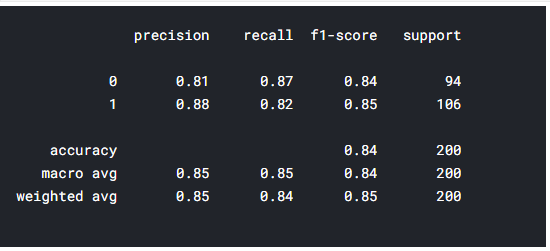

Foi possível observar que os valores de acurácia ficaram na faixa dos 84%. A divisão de conjunto de testes e treinamento foi realizado conforme o **grupo 2** deste notebook. Os valores encontrados são compatíveis com os observáveis no *Kaggle*.

Realizando a comparação com o método **KNN Classification**, que apresentou acurácia na faixa dos 78%, é possível ver que o método de árvore de decisão é mais eficaz.

Outra implementação realizada foi com **Random Forest**, que gerou acurácia em 85% (resultados similares que colocam em pé de igualdade com o algoritmo de árvore de decisão).

# Tabela de resultados

A seguir estão exemplificados alguns resultados que obtivemos com algumas execuções.

Em todas as tabelas foi utilizada **entropia**.

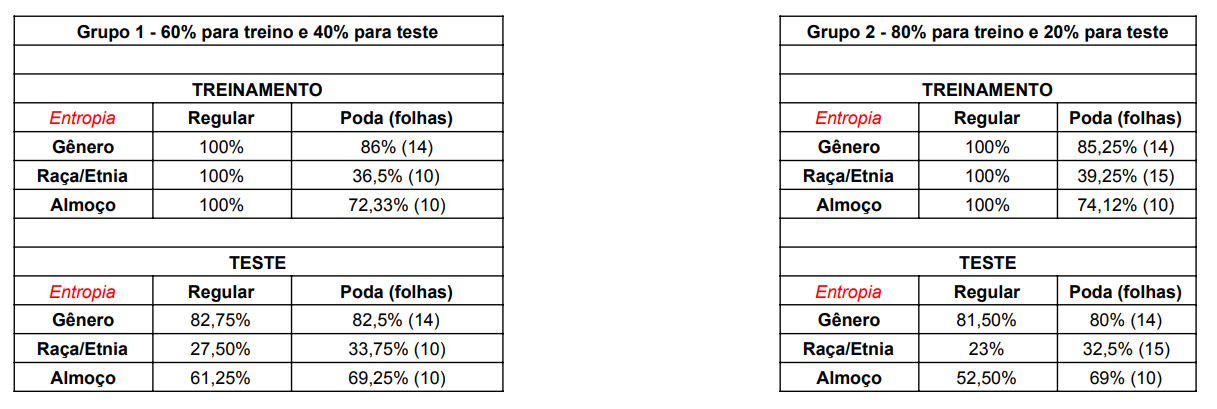



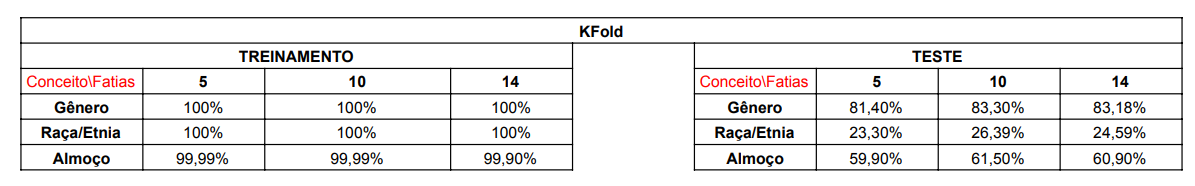